In [2]:
%matplotlib notebook
import random
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


In [3]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    #random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):  #@save
    """平方误差"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
torch.set_printoptions(precision=3, sci_mode=False)

In [4]:
def gen_x(examples, feature_num):
    a = torch.linspace(0, examples, steps=examples+1, out=None)
    a = a.unsqueeze(0)
    b = a
    for i in range(feature_num-1):
        b = torch.cat((b, a))
    return b.T
gen_x(9, 2)

tensor([[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.],
        [8., 8.],
        [9., 9.]])

torch.Size([11, 2])


<IPython.core.display.Javascript object>


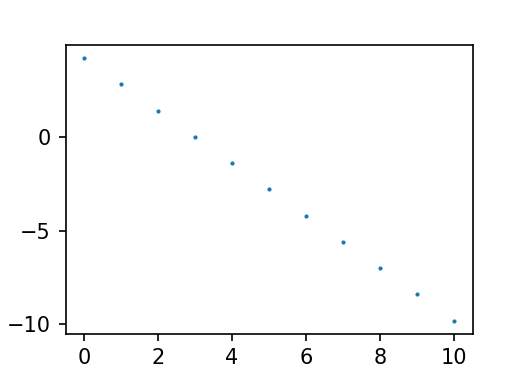

tensor([[ 0.,  0.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6.,  6.],
        [ 7.,  7.],
        [ 8.,  8.],
        [ 9.,  9.],
        [10., 10.]])
tensor([[     4.200],
        [     2.800],
        [     1.400],
        [    -0.000],
        [    -1.400],
        [    -2.800],
        [    -4.200],
        [    -5.600],
        [    -7.000],
        [    -8.400],
        [    -9.800]])


In [5]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    #X = torch.normal(0, 0.01, size=[num_examples, len(w)])
    X = gen_x(num_examples, len(w))
    print(X.shape)
    
    y = torch.matmul(X, w) + b
#    y += torch.normal(0, 0.001, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2.0, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 10)

d2l.set_figsize()
plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);

print(features)
print(labels)

<IPython.core.display.Javascript object>


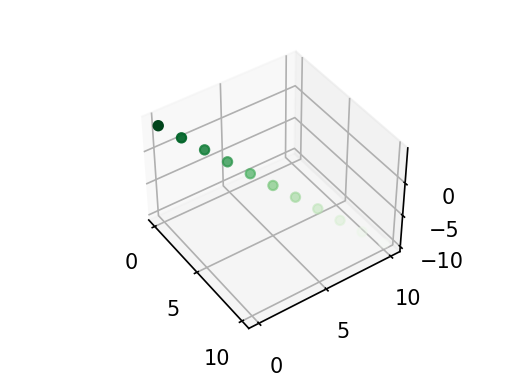

In [6]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = labels
xdata = features[:, 0]
ydata = features[:, 1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
batch_size = 11

#w = torch.normal(0, 0.01, size=([2]), requires_grad=True)
w = torch.tensor([1.0, -1.0], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.03
num_epochs = 100
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        l = loss(y_hat, y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 16.545933
epoch 2, loss 20.112391
epoch 3, loss 24.610079
epoch 4, loss 30.278875
epoch 5, loss 37.420494
epoch 6, loss 46.414402
epoch 7, loss 57.737942
epoch 8, loss 71.991501
epoch 9, loss 89.930275
epoch 10, loss 112.504074
epoch 11, loss 140.907623
epoch 12, loss 176.643661
epoch 13, loss 221.602295
epoch 14, loss 278.160858
epoch 15, loss 349.309845
epoch 16, loss 438.809967
epoch 17, loss 551.392517
epoch 18, loss 693.007568
epoch 19, loss 871.139465
epoch 20, loss 1095.202515
epoch 21, loss 1377.036743
epoch 22, loss 1731.535034
epoch 23, loss 2177.430664
epoch 24, loss 2738.284912
epoch 25, loss 3443.734131
epoch 26, loss 4331.054199
epoch 27, loss 5447.127930
epoch 28, loss 6850.933105
epoch 29, loss 8616.639648
epoch 30, loss 10837.546875
epoch 31, loss 13631.008789
epoch 32, loss 17144.619141
epoch 33, loss 21564.039062
epoch 34, loss 27122.773438
epoch 35, loss 34114.550781
epoch 36, loss 42908.800781
epoch 37, loss 53970.152344
epoch 38, loss 67883.125000
ep

In [10]:
true_w, true_b, w, b

(tensor([ 2.000, -3.400]),
 4.2,
 tensor([37741.801, 37739.801], requires_grad=True),
 tensor([5415.883], requires_grad=True))